In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_score



**The objective of our analysis is to find out wether the customer would honor their reservation or not**



In [2]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/Hotel Reservations.csv')

In [3]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.0,NaN,NaN,NaN,1.844962,0.518715,0.0,2.0,2.0,2.0,4.0
no_of_children,36275.0,NaN,NaN,NaN,0.105279,0.402648,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,36275.0,NaN,NaN,NaN,0.810724,0.870644,0.0,0.0,1.0,2.0,7.0
no_of_week_nights,36275.0,NaN,NaN,NaN,2.2043,1.410905,0.0,1.0,2.0,3.0,17.0
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.0,NaN,NaN,NaN,0.030986,0.173281,0.0,0.0,0.0,0.0,1.0
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.0,NaN,NaN,NaN,85.232557,85.930817,0.0,17.0,57.0,126.0,443.0
arrival_year,36275.0,NaN,NaN,NaN,2017.820427,0.383836,2017.0,2018.0,2018.0,2018.0,2018.0


In [6]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


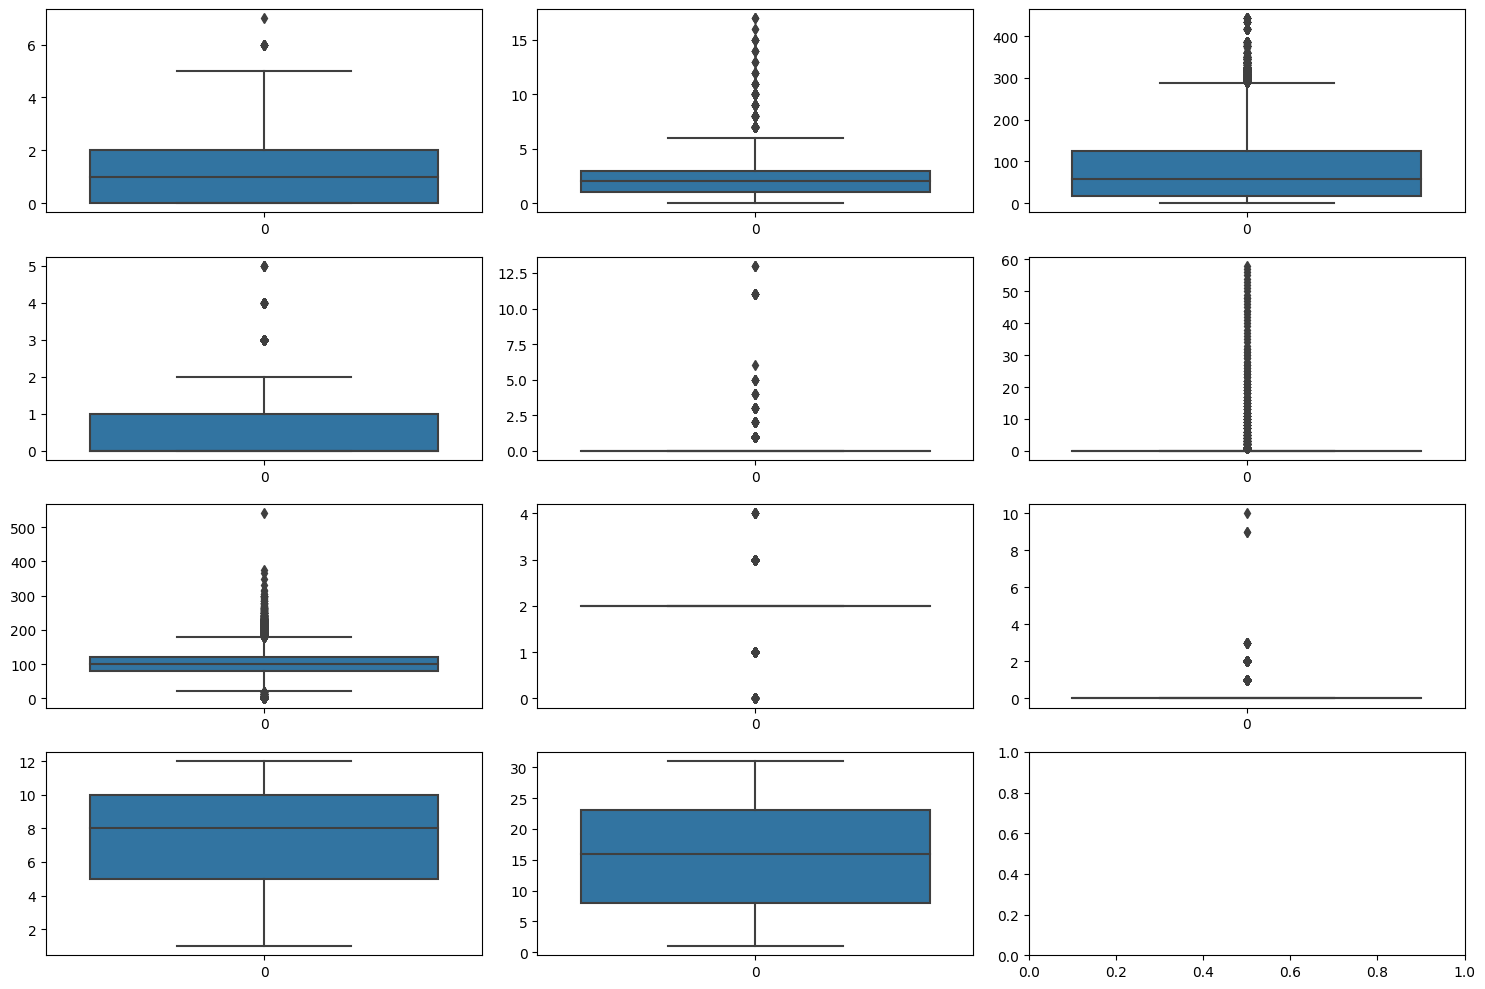

In [7]:
fig, axs = plt.subplots(4,3, figsize = (15,10))
plt1 = sns.boxplot(df['no_of_weekend_nights'], ax = axs[0,0])
plt2 = sns.boxplot(df['no_of_week_nights'], ax = axs[0,1])
plt3 = sns.boxplot(df['lead_time'], ax = axs[0,2])
plt4 = sns.boxplot(df['no_of_special_requests'], ax = axs[1,0])
plt5 = sns.boxplot(df['no_of_previous_cancellations'], ax = axs[1,1])
plt6 = sns.boxplot(df['no_of_previous_bookings_not_canceled'], ax = axs[1,2])
plt7 = sns.boxplot(df['avg_price_per_room'], ax = axs[2,0])
plt8 = sns.boxplot(df['no_of_adults'], ax = axs[2,1])
plt9 = sns.boxplot(df['no_of_children'], ax = axs[2,2])
plt10 = sns.boxplot(df['arrival_month'], ax = axs[3,0])
plt11 = sns.boxplot(df['arrival_date'], ax = axs[3,1])

plt.tight_layout()

In [8]:
df[df['avg_price_per_room'] > 200].count()

Booking_ID                              496
no_of_adults                            496
no_of_children                          496
no_of_weekend_nights                    496
no_of_week_nights                       496
type_of_meal_plan                       496
required_car_parking_space              496
room_type_reserved                      496
lead_time                               496
arrival_year                            496
arrival_month                           496
arrival_date                            496
market_segment_type                     496
repeated_guest                          496
no_of_previous_cancellations            496
no_of_previous_bookings_not_canceled    496
avg_price_per_room                      496
no_of_special_requests                  496
booking_status                          496
dtype: int64

In [9]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [10]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['avg_price_per_room'] >= Q1 - 1.5*IQR) & (df['avg_price_per_room'] <= Q3 + 1.5*IQR)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34579 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            34579 non-null  object 
 1   no_of_adults                          34579 non-null  int64  
 2   no_of_children                        34579 non-null  int64  
 3   no_of_weekend_nights                  34579 non-null  int64  
 4   no_of_week_nights                     34579 non-null  int64  
 5   type_of_meal_plan                     34579 non-null  object 
 6   required_car_parking_space            34579 non-null  int64  
 7   room_type_reserved                    34579 non-null  object 
 8   lead_time                             34579 non-null  int64  
 9   arrival_year                          34579 non-null  int64  
 10  arrival_month                         34579 non-null  int64  
 11  arrival_date        

In [12]:
#Removed the outliers for children variable 

df = df[df['no_of_children'] < 7]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34576 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            34576 non-null  object 
 1   no_of_adults                          34576 non-null  int64  
 2   no_of_children                        34576 non-null  int64  
 3   no_of_weekend_nights                  34576 non-null  int64  
 4   no_of_week_nights                     34576 non-null  int64  
 5   type_of_meal_plan                     34576 non-null  object 
 6   required_car_parking_space            34576 non-null  int64  
 7   room_type_reserved                    34576 non-null  object 
 8   lead_time                             34576 non-null  int64  
 9   arrival_year                          34576 non-null  int64  
 10  arrival_month                         34576 non-null  int64  
 11  arrival_date        

In [14]:
df = df[df['no_of_previous_cancellations'] < 9]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34547 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            34547 non-null  object 
 1   no_of_adults                          34547 non-null  int64  
 2   no_of_children                        34547 non-null  int64  
 3   no_of_weekend_nights                  34547 non-null  int64  
 4   no_of_week_nights                     34547 non-null  int64  
 5   type_of_meal_plan                     34547 non-null  object 
 6   required_car_parking_space            34547 non-null  int64  
 7   room_type_reserved                    34547 non-null  object 
 8   lead_time                             34547 non-null  int64  
 9   arrival_year                          34547 non-null  int64  
 10  arrival_month                         34547 non-null  int64  
 11  arrival_date        

<Axes: xlabel='arrival_date', ylabel='Count'>

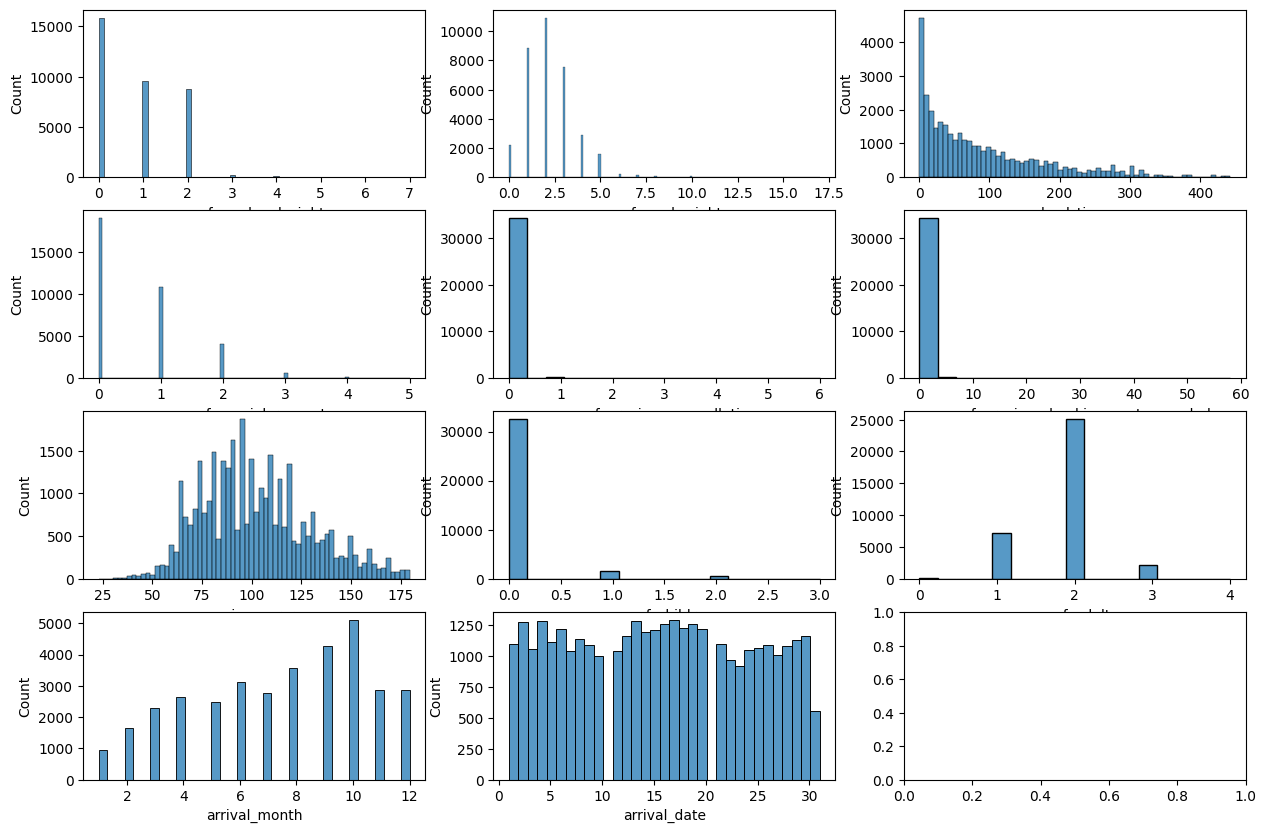

In [16]:
fig, axs = plt.subplots(4,3, figsize=(15,10))

sns.histplot(df['no_of_weekend_nights'], ax =axs[0][0])
sns.histplot(df['no_of_week_nights'], ax=axs[0][1])
sns.histplot(df['lead_time'], ax=axs[0][2])
sns.histplot(df['no_of_special_requests'],ax =axs[1][0])
sns.histplot(df['no_of_previous_cancellations'],ax=axs[1][1])
sns.histplot(df['no_of_previous_bookings_not_canceled'], ax =axs[1][2])
sns.histplot(df['avg_price_per_room'], ax =axs[2][0])
sns.histplot(df['no_of_children'], ax =axs[2][1])
sns.histplot(df['no_of_adults'], ax =axs[2][2])
sns.histplot(df['arrival_month'], ax =axs[3][0])
sns.histplot(df['arrival_date'], ax =axs[3][1])

<Axes: xlabel='booking_status', ylabel='arrival_date'>

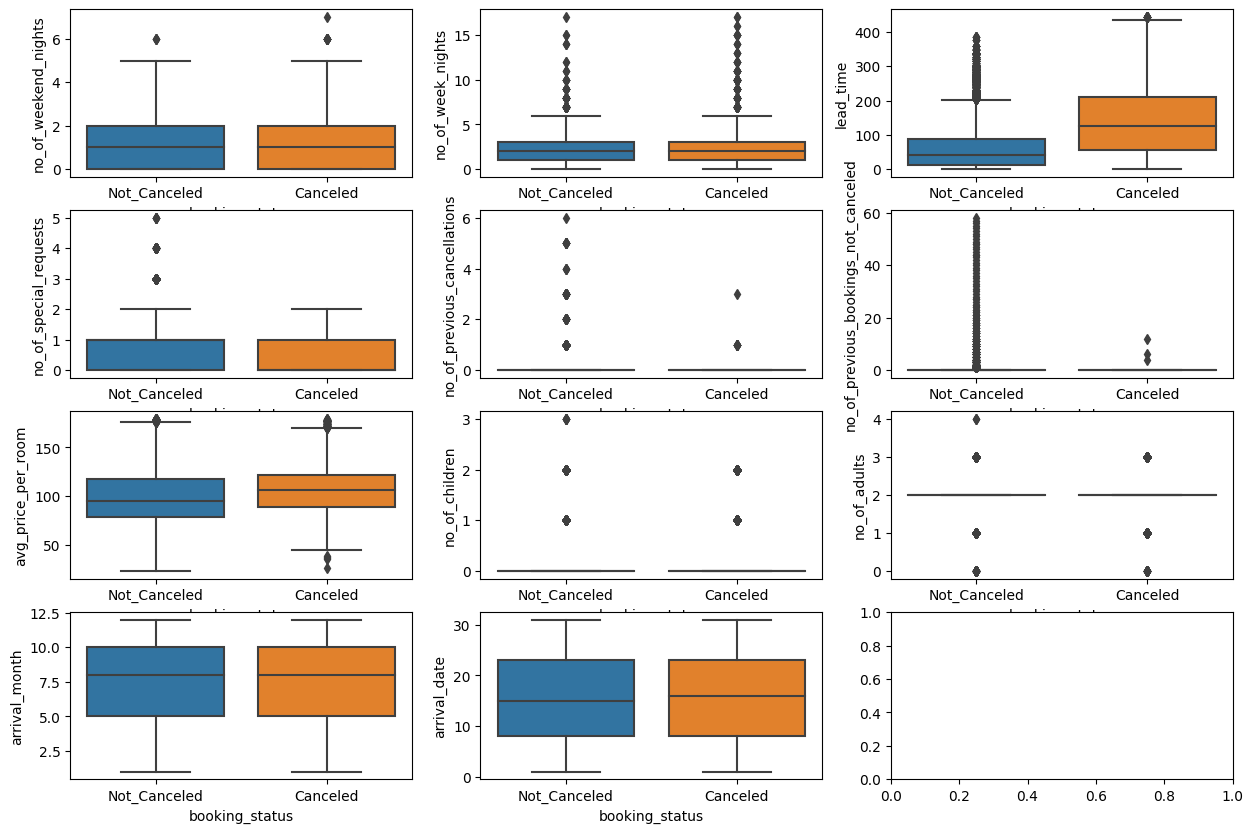

In [17]:
fig, axs = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(x='booking_status', y='no_of_weekend_nights', data=df, ax=axs[0][0])
sns.boxplot(x='booking_status', y='no_of_week_nights', data=df, ax=axs[0][1])
sns.boxplot(x='booking_status', y='lead_time', data=df, ax=axs[0][2])
sns.boxplot(x='booking_status', y='no_of_special_requests', data=df, ax=axs[1][0])
sns.boxplot(x='booking_status', y='no_of_previous_cancellations', data=df, ax=axs[1][1])
sns.boxplot(x='booking_status', y='no_of_previous_bookings_not_canceled', data=df, ax=axs[1][2])
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df, ax=axs[2][0])
sns.boxplot(x='booking_status', y='no_of_children', data=df, ax=axs[2][1])
sns.boxplot(x='booking_status', y='no_of_adults', data=df, ax=axs[2][2])
sns.boxplot(x='booking_status', y='arrival_month', data=df, ax=axs[3][0])
sns.boxplot(x='booking_status', y='arrival_date', data=df, ax=axs[3][1])

**Initial hypothesis no.of previous cancellations, leadtime, no_previous cancalltion not cancelled, avg price can be a predictor

In [18]:
## Categorical Varibale 
df.groupby(['type_of_meal_plan', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
type_of_meal_plan,,
Meal Plan 1,8373,18069
Meal Plan 2,1386,1641
Not Selected,1697,3381


In [19]:
df.groupby(['required_car_parking_space', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
required_car_parking_space,,
0,11352,22189
1,104,902


In [20]:
df.groupby(['room_type_reserved', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
room_type_reserved,,
Room_Type 1,9002,18489
Room_Type 2,217,422
Room_Type 3,2,3
Room_Type 4,1994,3744
Room_Type 5,57,159
Room_Type 6,180,258
Room_Type 7,4,16


In [21]:
df.groupby(['arrival_year', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
arrival_year,,
2017,921,5223
2018,10535,17868


In [22]:
df.groupby(['market_segment_type', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
market_segment_type,,
Aviation,37.0,88.0
Complementary,NaN,16.0
Corporate,219.0,1787.0
Offline,3105.0,7326.0
Online,8095.0,13874.0


In [23]:
df.groupby(['repeated_guest', 'booking_status'])['Booking_ID'].count().unstack()


booking_status,Canceled,Not_Canceled
repeated_guest,,
0,11444,22335
1,12,756


In [24]:
# Check if there is any diffenreitating factor teri
df[df['booking_status'] =='Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456,11456.000000,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456,11456.000000,11456.000000,11456.000000,11456.000000,11456.000000,11456
unique,11456,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1
top,INN00003,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Canceled
freq,1,NaN,NaN,NaN,NaN,8373,NaN,9002,NaN,NaN,NaN,NaN,8095,NaN,NaN,NaN,NaN,NaN,11456
mean,NaN,1.902060,0.085108,0.885824,2.386697,NaN,0.009078,NaN,141.610161,2017.919605,7.374825,15.684270,NaN,0.001047,0.001222,0.001920,107.115863,0.335894,NaN
std,NaN,0.483523,0.343045,0.916346,1.580405,NaN,0.094850,NaN,99.077245,0.271915,2.668904,8.812331,NaN,0.032349,0.041767,0.130793,25.470486,0.574861,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,26.350000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,57.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,89.100000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,126.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,106.300000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,209.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,121.600000,1.000000,NaN


In [25]:
df[df['booking_status'] =='Not_Canceled'].describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091,23091.000000,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091,23091.000000,23091.000000,23091.000000,23091.000000,23091.000000,23091
unique,23091,NaN,NaN,NaN,NaN,3,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,1
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,18069,NaN,18489,NaN,NaN,NaN,NaN,13874,NaN,NaN,NaN,NaN,NaN,23091
mean,NaN,1.814776,0.070937,0.785977,2.141181,NaN,0.039063,NaN,60.683470,2017.773808,7.429258,15.511758,NaN,0.032740,0.018276,0.188342,99.630679,0.742454,NaN
std,NaN,0.521217,0.308098,0.846164,1.311239,NaN,0.193749,NaN,64.479277,0.418374,3.260225,8.719699,NaN,0.177959,0.206676,2.001817,27.917869,0.826567,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,23.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,12.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,79.000000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,40.000000,2018.000000,8.000000,15.000000,NaN,0.000000,0.000000,0.000000,95.000000,1.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,88.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,117.900000,1.000000,NaN


In [26]:
df['required_car_parking_space'].unique()

array([0, 1])

In [27]:
meal = pd.get_dummies(df['type_of_meal_plan'],dtype=int)

parking=pd.get_dummies(df['required_car_parking_space'],dtype=int)
parking.rename(columns={0: "Required", 1: "Not_required"},inplace=True)

market = pd.get_dummies(df['market_segment_type'],dtype=int)

room_size=pd.get_dummies(df['room_type_reserved'],dtype=int)
year_stayed=pd.get_dummies(df['arrival_year'],dtype=int)
year_stayed.rename(columns={2017: "year_seven", 2018: "year_eight"}, inplace=True)

repeated = pd.get_dummies(df['repeated_guest'], dtype=int)
repeated.rename(columns={0: "Not_repeated", 1: "Repeated"}, inplace=True)




## ONLY the hypothesis one


In [28]:
new_df = pd.concat([df[['lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room']],meal,parking, market, room_size, year_stayed,repeated,df['booking_status']], axis=1)

In [29]:
new_df

,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,Meal Plan 1,Meal Plan 2,Not Selected,Required,Not_required,Aviation,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,year_seven,year_eight,Not_repeated,Repeated,booking_status
0,224,0,0,65.00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,Not_Canceled
1,5,0,0,106.68,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,Not_Canceled
2,1,0,0,60.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,Canceled
3,211,0,0,100.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,Canceled
4,48,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,0,0,167.80,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,Not_Canceled
36271,228,0,0,90.95,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,Canceled
36272,148,0,0,98.39,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,Not_Canceled
36273,63,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,Canceled


In [30]:
new_df.dropna(inplace=True)

In [31]:
def booking_stat(x):
    if x =='Not_Canceled':
        return 1
    elif x =='Canceled':
        return 0

In [32]:
new_df['booking_status']= new_df['booking_status'].apply(booking_stat)

In [33]:
new_df

,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,Meal Plan 1,Meal Plan 2,Not Selected,Required,Not_required,Aviation,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,year_seven,year_eight,Not_repeated,Repeated,booking_status
0,224,0,0,65.00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,5,0,0,106.68,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,60.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,211,0,0,100.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,48,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,0,0,167.80,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,1
36271,228,0,0,90.95,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
36272,148,0,0,98.39,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
36273,63,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [35]:
new_df

,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,Meal Plan 1,Meal Plan 2,Not Selected,Required,Not_required,Aviation,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,year_seven,year_eight,Not_repeated,Repeated,booking_status
0,224,0,0,65.00,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,5,0,0,106.68,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,60.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,211,0,0,100.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,48,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,85,0,0,167.80,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,1
36271,228,0,0,90.95,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
36272,148,0,0,98.39,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
36273,63,0,0,94.50,0,0,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
knn =KNeighborsClassifier(n_neighbors=50)

knn.fit(np.array(new_df.iloc[:,:25]), np.array(new_df.iloc[:,25]))

KNeighborsClassifier(n_neighbors=50)

In [37]:
pred = knn.predict(new_df.iloc[:,:25])

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [38]:
print(accuracy_score(pred, new_df.iloc[:,25]))

0.7967117260543607


In [39]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [40]:
log = LogisticRegression() 
knn=KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()
#SVC Has hyptertunning 
#split data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(np.array(new_df.iloc[:,:25]), np.array(new_df.iloc[:,25]), test_size=0.2, random_state=123)

In [42]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [43]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [44]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.8309958631823227
0.21219047619047618
0.8502323616392057
0.8408869869675161


In [45]:
print(precision_score(pred_l,y_test))
print(precision_score(pred_nb,y_test))
print(precision_score(pred_knn,y_test))
print(precision_score(pred_svc,y_test))

0.8938571738658563
0.12090297373561971
0.8736705014108964
0.9383546776644237


In [46]:
pred_l_prob =log.predict_proba(X_test)

In [47]:
pred_l_prob

array([[0.31044214, 0.68955786],
       [0.45520921, 0.54479079],
       [0.64915759, 0.35084241],
       ...,
       [0.86352419, 0.13647581],
       [0.61869248, 0.38130752],
       [0.58689546, 0.41310454]])

In [48]:
fpr, tpr, thresholds =roc_curve(y_test, pred_l_prob[:,1])

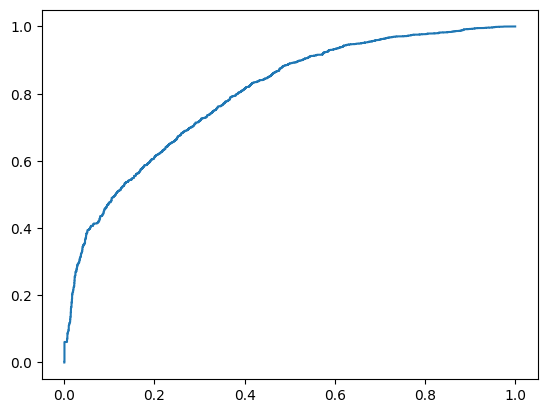

In [49]:
plt.plot(fpr,tpr)

In [50]:
gmeans = np.sqrt(tpr*(1-fpr))

In [51]:
gmeans

array([0.        , 0.02946598, 0.0488638 , ..., 0.06251357, 0.04659486,
       0.        ])

In [52]:
np.argmax(gmeans)

1258

In [58]:
knn_params ={'n_neighbors': range (3,300),'weights': ['uniform', 'distance'], 'metric':['euclidean','manhattan']}
rs_knn=RandomizedSearchCV(knn,knn_params, n_iter=10, cv=5, scoring='precision')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=182, weights='distance')

In [59]:
knn_best = KNeighborsClassifier(n_neighbors=182, metric='manhattan', weights='distance' )
knn_best.fit(X_train,y_train)
pred_knn_best = knn_best.predict(X_test)
print(f1_score(pred_knn_best, y_test))

0.8788097944002479


In [60]:
cv_scores_knn = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='precision')
print("Cross-validation scores for KNN: ", cv_scores_knn)


Cross-validation scores for KNN:  [0.82398266 0.83191644 0.83594515 0.83493471 0.84123457]


In [56]:
from sklearn.model_selection import RandomizedSearchCV



In [61]:
svc_params = {'kernel':['linear']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=10, scoring='precision')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
